# Notebook for making plots of IFE data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, random
import pathlib
import glob
import shutil

### Overview of a charge and discharge data file for a representative cell

In [2]:
test_dch = pathlib.Path(r"C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data") / "Cell_ID_SK05A14198_Test_13911_104_dch.txt"
print(test_dch.is_file())
test_cha = pathlib.Path(r"C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data") / "Cell_ID_SK05A14198_Test_13911_104_cha.txt"
print(test_cha.is_file())

True
True


In [3]:
df_dch = pd.read_csv(test_dch, encoding = "ISO-8859-1", sep='\t')
df_cha = pd.read_csv(test_cha, encoding = "ISO-8859-1", sep='\t')
df_dch

,Ah_balance (normalized),Ah_balance (mAh),Voltage - fit (V),Voltage - interpolate (V),dQ/dV (1/V),Temperature (°C),Temperature - diff (°C),Current (C),R_DC 0ms (mOhm),R_DC 50ms (mOhm),R_DC 50 ms PEC (mOhm)
0,0.0005,31.11,4.165,4.1649,-0.1685,35.96,0.01,-0.75,NaN,NaN,NaN
1,0.0011,70.43,4.162,4.1620,-0.2324,35.95,0.00,-0.75,NaN,NaN,NaN
2,0.0019,121.07,4.159,4.1590,-0.2911,35.95,0.00,-0.75,NaN,NaN,NaN
3,0.0029,183.19,4.156,4.1559,-0.3467,35.95,0.00,-0.75,NaN,NaN,NaN
4,0.0040,256.69,4.153,4.1530,-0.4007,35.95,0.00,-0.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
383,0.9334,59736.42,3.016,3.0160,-0.0756,38.48,2.53,-0.75,NaN,NaN,NaN
384,0.9336,59750.91,3.013,3.0130,-0.0752,38.49,2.54,-0.75,NaN,NaN,NaN
385,0.9338,59765.31,3.010,3.0100,-0.0748,38.49,2.54,-0.75,NaN,NaN,NaN
386,0.9341,59779.53,3.007,3.0070,-0.0747,38.50,2.55,-0.75,NaN,NaN,NaN


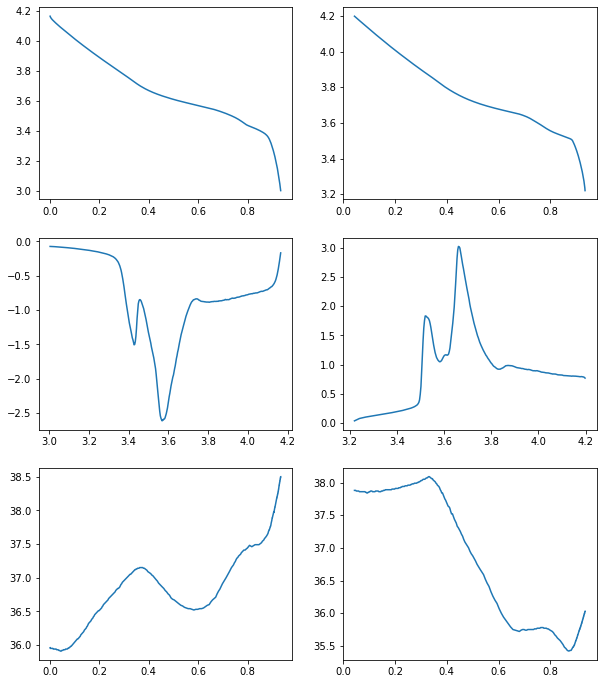

In [4]:
# Plots of some key charge/discharge data
fig, ax = plt.subplots(figsize=(10, 12), ncols=2, nrows=3)

ax[0,0].plot(df_dch['Ah_balance (normalized)'], df_dch['Voltage - fit (V)'])
ax[0,1].plot(df_cha['Ah_balance (normalized)'], df_cha['Voltage - fit (V)'])

ax[1,0].plot(df_dch['Voltage - fit (V)'], df_dch['dQ/dV (1/V)'])
ax[1,1].plot(df_cha['Voltage - fit (V)'], df_cha['dQ/dV (1/V)'])

ax[2,0].plot(df_dch['Ah_balance (normalized)'], df_dch['Temperature (°C)'])
ax[2,1].plot(df_cha['Ah_balance (normalized)'], df_cha['Temperature (°C)'])

In [5]:
# Make list of all discharge data files for a representative cell
cycles = []
for name in glob.glob(r"C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data\Cell_ID_SK05A14198*[dch].txt"):
    cycle = pd.read_csv(name, encoding = "ISO-8859-1", sep='\t')
    if('Voltage - fit (V)' in cycle):
        cycles.append(cycle)
    else:
        print(name)

print(len(cycles))

C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data\Cell_ID_SK05A14198_Test_13322_4_R_DC.txt
C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data\Cell_ID_SK05A14198_Test_13456_1_R_DC.txt
C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data\Cell_ID_SK05A14198_Test_13601_4_R_DC.txt
C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data\Cell_ID_SK05A14198_Test_13723_4_R_DC.txt
C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data\Cell_ID_SK05A14198_Test_13867_4_R_DC.txt
C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_data\Cell_ID_SK05A14198_Test_14007_4_R_DC.txt
C:\Users\ife12216\OneDrive - Institutt for Energiteknikk\Documents\Masteroppgave\IFEData\LG_JP3\curves_dat

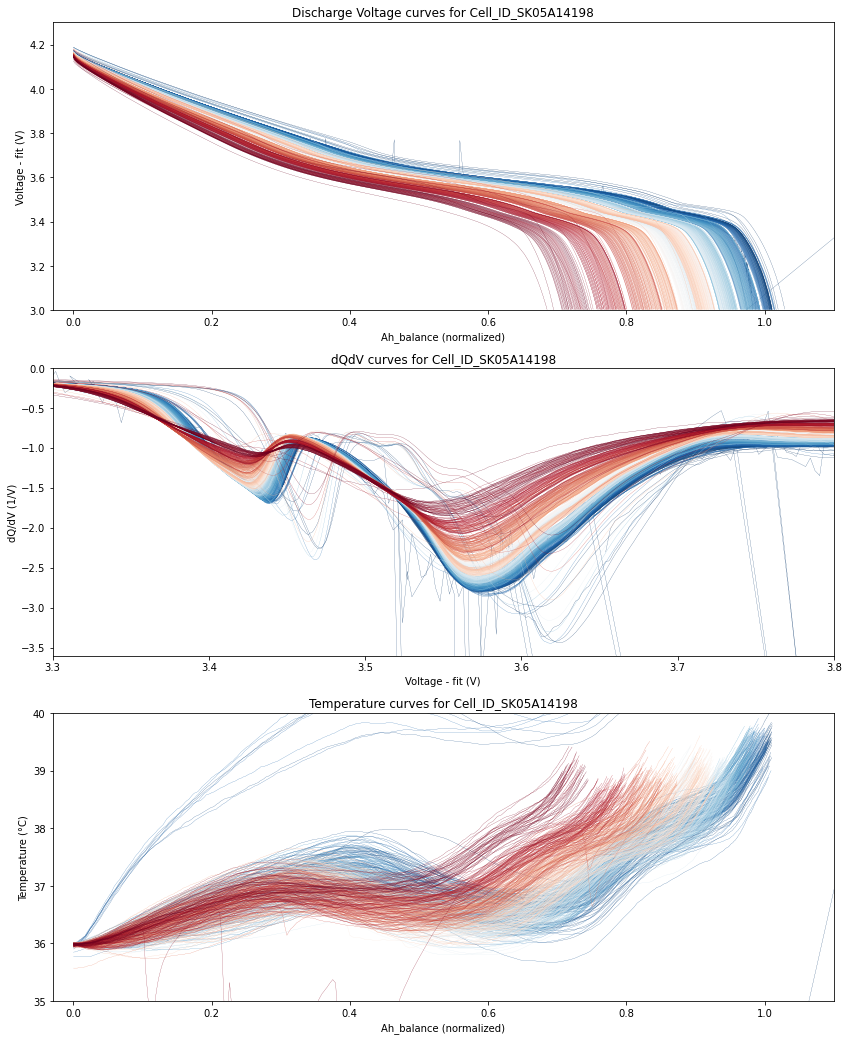

In [14]:
# Plot all discharge and dQdV curves for the cell and color-sort by cycle number (actually just file order)

# Cell Cell_ID_SK05A14198 is cycled under 35 degrees with SOC 8-100%. It has 631 normalized cycles, 751 regular cycles.
# Most cycles have between 381 and 390 data points, find a way to make all same size?
# Find out how to identify cycle number/normalised cycle number from the data or filename

cycle_numbers = np.linspace(0,1,len(cycles))
colormap = mpl.cm.ScalarMappable(cmap='RdBu_r')
colors = colormap.to_rgba(cycle_numbers)

fig, ax = plt.subplots(3, figsize=(14,18))

for i in range(len(cycles)):
    ax[0].plot(cycles[i]['Ah_balance (normalized)'], cycles[i]['Voltage - fit (V)'], linewidth=0.2, color=colors[i])
    ax[0].set_xlim(-0.03,1.1)
    ax[0].set_ylim(3,4.3)
    ax[0].set_xlabel('Ah_balance (normalized)')
    ax[0].set_ylabel('Voltage - fit (V)')
    ax[0].set_title('Discharge Voltage curves for Cell_ID_SK05A14198')
    
    ax[1].plot(cycles[i]['Voltage - fit (V)'], cycles[i]['dQ/dV (1/V)'], linewidth=0.2, color=colors[i])
    ax[1].set_xlim(3.3, 3.8)
    ax[1].set_ylim(-3.6,0)
    ax[1].set_xlabel('Voltage - fit (V)')
    ax[1].set_ylabel('dQ/dV (1/V)')
    ax[1].set_title('dQdV curves for Cell_ID_SK05A14198')
    
    ax[2].plot(cycles[i]['Ah_balance (normalized)'], cycles[i]['Temperature (°C)'], linewidth=0.2, color=colors[i])
    ax[2].set_xlim(-0.03,1.1)
    ax[2].set_ylim(35,40)
    ax[2].set_xlabel('Ah_balance (normalized)')
    ax[2].set_ylabel('Temperature (°C)')
    ax[2].set_title('Temperature curves for Cell_ID_SK05A14198')

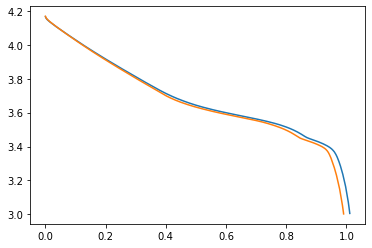

In [7]:
plt.plot(cycles[8]['Ah_balance (normalized)'], cycles[8]['Voltage - fit (V)'])
plt.plot(cycles[100]['Ah_balance (normalized)'], cycles[100]['Voltage - fit (V)'])
plt.show()